---

# Figure plots

>This notebook contains code for plotting figures used in the paper

---

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

In [20]:
query_chroma_path = 'chroma/queries'
query_pitch_path = 'pitch/queries'
plots_path = 'plots'

## Example chroma and pitch track plot

In [21]:
example_chroma = np.load(os.path.join(query_chroma_path, 'q9.npy'))
example_pitch = np.load(os.path.join(query_pitch_path, 'q9.npy'))

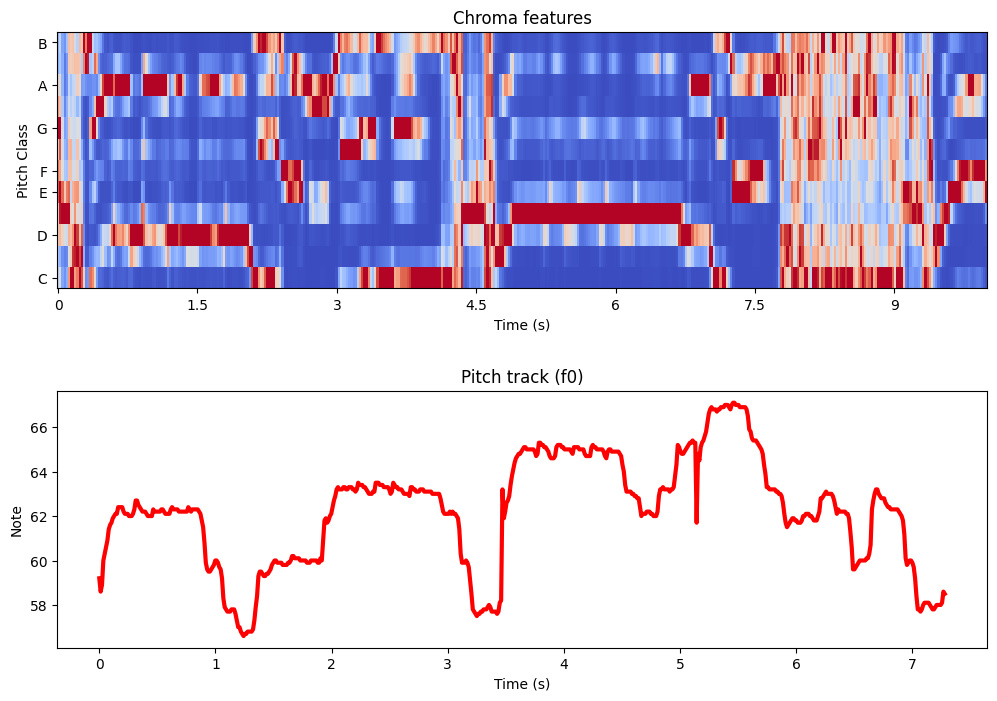

In [42]:
# Create directory to save plot
os.makedirs(plots_path, exist_ok=True)

plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(2, 1, 1)
librosa.display.specshow(example_chroma, x_axis="time", y_axis="chroma", cmap="coolwarm")
plt.title("Chroma features")
plt.xlabel("Time (s)")
plt.ylabel("Pitch Class")
plt.subplot(2, 1, 2)
times = librosa.times_like(example_pitch, sr=44100)
plt.plot(times, example_pitch, label='f0', color='red', linewidth=3)
plt.title("Pitch track (f0)")
plt.xlabel("Time (s)")
plt.ylabel("Note")
plt.savefig(f'{plots_path}/features.png')
plt.show()

## Find the worst performing song and plot the pitch track

In [29]:
queries = pd.read_csv('metadata/Queries.csv')
collection_ids = [int(f[:-4]) for f in os.listdir('chroma/raw')]
queries = queries[queries["Song ID"].isin(collection_ids)]
queries.head()

,Filename,Query ID,Song ID,Title,Original artist,Class label
0,q1.wav,q1,1118,Mother natures son,The Beatles,mothernat
1,q2.wav,q2,1438,Scarborough fair,Unknown,scarborou
4,q5.wav,q5,1808,When I am sixty four,The Beatles,whenim64
7,q8.wav,q8,593,Girl,The Beatles,girl
8,q9.wav,q9,1224,Ob la di ob la da,The Beatles,obladi


In [30]:
def find_worst_song(feature, collection):
    lowest_rank = 0
    
    for i, query in queries.iterrows():
        # Load results for the query
        results = pd.read_csv(f"results/{feature}/{collection}/{query['Query ID']}.csv")
    
        # Get the rank
        rank = results.index[results['Song ID'] == query['Song ID']][0] + 1

        if rank > lowest_rank:
            lowest_rank = rank
            worst_song = query['Song ID']

    return worst_song

In [32]:
worst_song = find_worst_song('pitch', 'spleeter')

1786

In [40]:
worst_pitch = np.load(f"pitch/spleeter/{worst_song}.npy") 

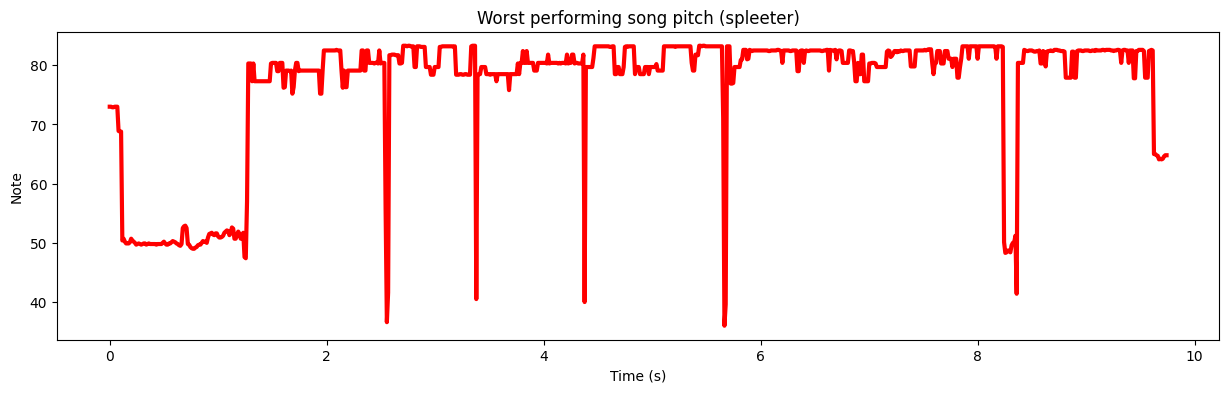

In [44]:
plt.figure(figsize=(15, 4))
times = librosa.times_like(worst_pitch, sr=44100)
plt.plot(times, worst_pitch, label='f0', color='red', linewidth=3)
plt.title("Worst performing song pitch (spleeter)")
plt.xlabel("Time (s)")
plt.ylabel("Note")
plt.savefig(f'{plots_path}/worst_song.png')
plt.show()